# Librerías

In [1]:
!pip install seaborn plotly scikit-learn xgboost
import pandas as pd
from sklearn.linear_model import Ridge
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


# Lectura del dataset

In [2]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Escritorio\ML_Bancolombia_Leader_Test\Punto_1\restaurants_dataset.csv")
print(f"Dimensión del dataset: {data.shape}  (filas, columnas)\n")
print("Tipos de datos por columna:\n", data.dtypes, "\n")
data.head()

Dimensión del dataset: (3493, 34)  (filas, columnas)

Tipos de datos por columna:
 Registration Number                int64
Annual Turnover                    int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endorsed By                       object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Resturant Tier                   float64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsivness                int64
Value for Money                    int64
Hygiene Rating 

Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
0   Near Business Hub                14-02-2009                          84.3   
1      Near Party Hub                29-09-2008                          85.4   
2   Near Business Hub                30-07-2011                          85.0   
3      Near Party Hub                30-11-2008                          85.6   
4      Near Party Hub                22-02-2010                           NaN   

        Endorsed By  Instagram Popularity Quotient  Fire Audit  ...  \
0      Not Specific                           95.8           1  ...   
1  Tier A Celebrity                           85.0           1  ...   
2  Tier A Celebrity                           68.2           1  ...   
3  Tier A Celebrity                           83.6           0  ...   
4  Tier A Celebrity                           76.8           1  ...   

   Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                       10.0                4.0                 NaN   
1                        9.0                NaN                 4.0   
2                        8.0                3.0                 NaN   
3                        9.0                6.0                 NaN   
4                        6.0                NaN                 2.0   

   Value Deals Rating  Live Sports Rating Ambience Lively  Service  \
0                 NaN                 NaN      8.0      8        6   
1                 NaN                 NaN      5.0      7        7   
2                 NaN                 NaN      7.0     10        5   
3                 NaN                 NaN      7.0      7        4   
4                 NaN                 NaN      NaN      6        2   

   Comfortablility  Privacy  
0                6        6  
1                3        8  
2                2        8  
3                3        5  
4                4        6  

[5 rows x 34 columns]

# Valores nulos

Porcentaje de valores nulos por columna:



% Nulos
Live Sports Rating             94.131119
Value Deals Rating             77.497853
Comedy Gigs Rating             71.085027
Live Music Rating              21.900945
Overall Restaurant Rating       6.069281
Facebook Popularity Quotient    2.834240
Instagram Popularity Quotient   1.603206
Resturant Tier                  1.402806
Ambience                        0.715717

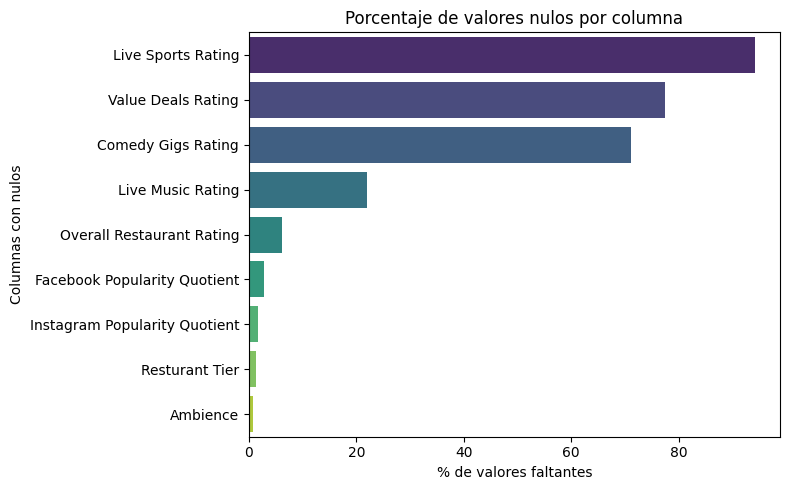

In [3]:
missing_pct = data.isnull().mean() * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

# Mostrar tabla de porcentajes de nulos
print("Porcentaje de valores nulos por columna:\n")
display(missing_pct.to_frame(name='% Nulos'))

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    x=missing_pct.values,
    y=missing_pct.index,
    palette="viridis"
)
plt.title("Porcentaje de valores nulos por columna")
plt.xlabel("% de valores faltantes")
plt.ylabel("Columnas con nulos")
plt.tight_layout()
plt.show()

In [4]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print("Estadísticas descriptivas de variables numéricas:\n")
display(data[num_cols].describe().T)

Estadísticas descriptivas de variables numéricas:



count          mean           std        min  \
Registration Number            3493.0  6.174700e+04  1.008487e+03    60001.0   
Annual Turnover                3493.0  3.072571e+07  2.165125e+07  3500000.0   
Facebook Popularity Quotient   3394.0  7.793872e+01  9.829169e+00       43.0   
Instagram Popularity Quotient  3437.0  7.440468e+01  1.094033e+01       40.0   
Fire Audit                     3493.0  7.887203e-01  4.082748e-01        0.0   
Liquor License Obtained        3493.0  9.882622e-01  1.077187e-01        0.0   
Situated in a Multi Complex    3493.0  8.081878e-01  3.937825e-01        0.0   
Dedicated Parking              3493.0  8.018895e-01  3.986329e-01        0.0   
Open Sitting Available         3493.0  8.001718e-01  3.999284e-01        0.0   
Resturant Tier                 3444.0  1.926539e+00  2.609297e-01        1.0   
Restaurant Zomato Rating       3493.0  2.696536e+00  7.872713e-01        0.0   
Restaurant City Tier           3493.0  3.014601e-01  4.589577e-01        0.0   
Order Wait Time                3493.0  5.509591e+00  2.854476e+00        1.0   
Staff Responsivness            3493.0  4.538506e+00  1.093832e+00        1.0   
Value for Money                3493.0  4.526482e+00  9.139370e-01        1.0   
Hygiene Rating                 3493.0  4.661895e+00  1.259523e+00        1.0   
Food Rating                    3493.0  7.522760e+00  1.722721e+00        5.0   
Overall Restaurant Rating      3281.0  8.479427e+00  1.287233e+00        6.0   
Live Music Rating              2728.0  4.012830e+00  1.009044e+00        1.0   
Comedy Gigs Rating             1010.0  2.932673e+00  8.595190e-01        1.0   
Value Deals Rating              786.0  3.655216e+00  9.732496e-01        1.0   
Live Sports Rating              205.0  3.590244e+00  9.063515e-01        2.0   
Ambience                       3468.0  6.423010e+00  2.050026e+00        0.0   
Lively                         3493.0  6.874893e+00  1.847131e+00        0.0   
Service                        3493.0  4.546808e+00  1.877063e+00        0.0   
Comfortablility                3493.0  3.231320e+00  1.993050e+00        0.0   
Privacy                        3493.0  6.275122e+00  1.895057e+00        0.0   

                                      25%          50%           75%  \
Registration Number               60874.0     61747.00  6.262000e+04   
Annual Turnover                18000000.0  30000000.00  3.700000e+07   
Facebook Popularity Quotient         72.0        79.00  8.574500e+01   
Instagram Popularity Quotient        66.0        74.05  8.240000e+01   
Fire Audit                            1.0         1.00  1.000000e+00   
Liquor License Obtained               1.0         1.00  1.000000e+00   
Situated in a Multi Complex           1.0         1.00  1.000000e+00   
Dedicated Parking                     1.0         1.00  1.000000e+00   
Open Sitting Available                1.0         1.00  1.000000e+00   
Resturant Tier                        2.0         2.00  2.000000e+00   
Restaurant Zomato Rating              2.0         3.00  3.000000e+00   
Restaurant City Tier                  0.0         0.00  1.000000e+00   
Order Wait Time                       3.0         5.00  8.000000e+00   
Staff Responsivness                   4.0         5.00  5.000000e+00   
Value for Money                       4.0         5.00  5.000000e+00   
Hygiene Rating                        4.0         5.00  6.000000e+00   
Food Rating                           6.0         7.00  9.000000e+00   
Overall Restaurant Rating             7.0         9.00  1.000000e+01   
Live Music Rating                     3.0         4.00  5.000000e+00   
Comedy Gigs Rating                    2.0         3.00  3.000000e+00   
Value Deals Rating                    3.0         4.00  4.000000e+00   
Live Sports Rating                    3.0         4.00  4.000000e+00   
Ambience                              5.0         7.00  8.000000e+00   
Lively                                6.0         7.00  8.00000

De la tabla anterior podemos concluir que:
- Annual Turnover: Tiene una media de 30.7 Millones y una mediana de 30 Millones, esto muestra que hay una cercanía relativa de entre la media y la mediana, sin embargo la media es un poco mayor a la mediana por lo que nuestra variable tendrá un sesgo a al derecha. Además tendrá una cola de valores muy altos, posiblemente outliers.
- El annual turnover tiene una rango amplio, es decir, sus valores van desde 3.5 Millones a 400 millones, con una desviación estandar de 21.65 Millones, esto quiere decir que hay bastante dispersión en los datos.
- Por la parte de popularidad en redes (Facebook e Instagram), tienen medias similares Facebook 77.9 e instagram 74.4, también se puede visualizar que para facebook la mayoría de los datos están entre los 72 y los 97. Y para instagram los valores estan entre los 66 y 98 puntos. Lo que nos indica que la mayoría de los restaurantes tienen buena popularidad.
- El promedio de la calificación de la comida (Food Rating) es 7.52, lo que indica que hy muchos restaurantes con buena comida. La mayoría va de 6 a 10 puntos.
- Para las variables de Ambience, Lively, Service, Comfortability y privacy tienen un promedio de alrededor de 6 para Ambience, Lively y Privacy. Por otro lado, Service y Comfortability, tiene una calificación promedio de 4.5 y 3.23. Lo que indica que la mayoría de los restaurantes tienen una calificación media. Encontraremos algunas colas con restaurantes con calificaciones latas y otros con calificaciones bajas.

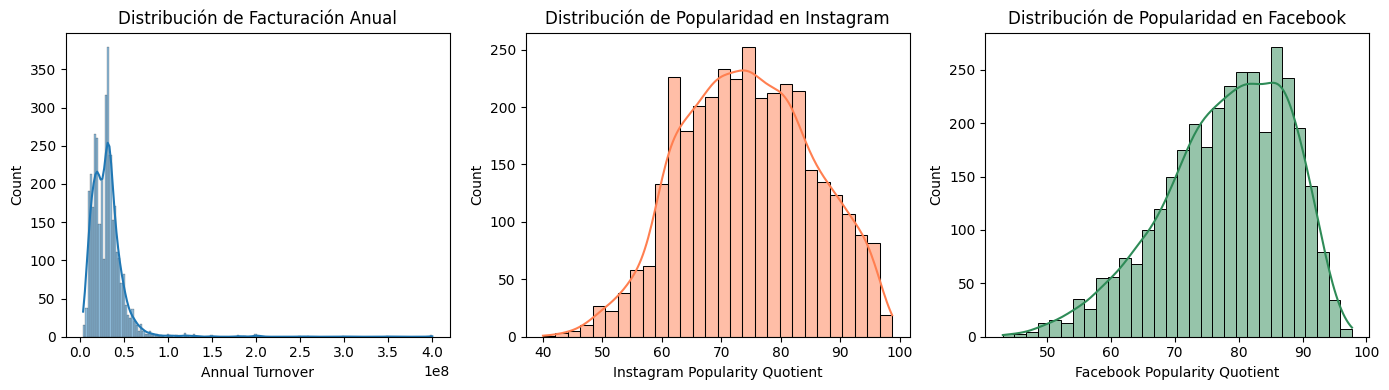

In [5]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(data['Annual Turnover'], kde=True)
plt.title("Distribución de Facturación Anual")
plt.xlabel("Annual Turnover")

plt.subplot(1, 3, 2)
sns.histplot(data['Instagram Popularity Quotient'], kde=True, color='coral')
plt.title("Distribución de Popularidad en Instagram")
plt.xlabel("Instagram Popularity Quotient")

plt.subplot(1, 3, 3)
sns.histplot(data['Facebook Popularity Quotient'], kde=True, color='seagreen')
plt.title("Distribución de Popularidad en Facebook")
plt.xlabel("Facebook Popularity Quotient")

plt.tight_layout()
plt.show()

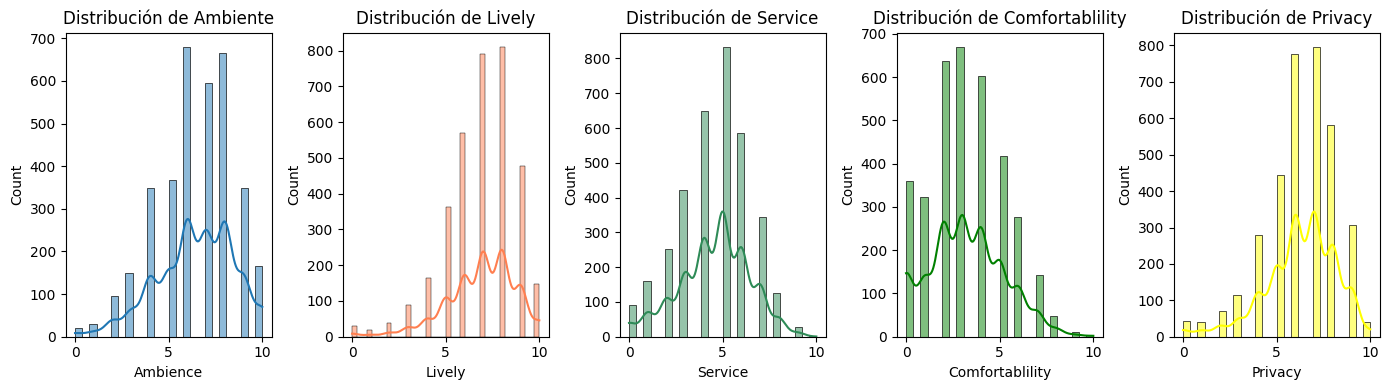

In [6]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 5, 1)
sns.histplot(data['Ambience'], kde=True)
plt.title("Distribución de Ambiente")
plt.xlabel("Ambience")

plt.subplot(1, 5, 2)
sns.histplot(data['Lively'], kde=True, color='coral')
plt.title("Distribución de Lively")
plt.xlabel("Lively")

plt.subplot(1, 5, 3)
sns.histplot(data['Service'], kde=True, color='seagreen')
plt.title("Distribución de Service")
plt.xlabel("Service")

plt.subplot(1, 5, 4)
sns.histplot(data['Comfortablility'], kde=True, color='green')
plt.title("Distribución de Comfortablility")
plt.xlabel("Comfortablility")

plt.subplot(1, 5, 5)
sns.histplot(data['Privacy'], kde=True, color='yellow')
plt.title("Distribución de Privacy")
plt.xlabel("Privacy")

plt.tight_layout()
plt.show()

In [7]:
import plotly.io as pio
pio.renderers.default = "notebook" 
top_cities = data['City'].value_counts().nlargest(20).reset_index()
top_cities.columns = ['City', 'Count']
fig1 = px.bar(
    top_cities,
    x='Count',
    y='City',
    orientation='h',
    title='Top 10 Ciudades con más Restaurantes',
    labels={'Count': 'Cantidad de Restaurantes', 'City': 'Ciudad'}
)
fig1.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    margin=dict(l=100, r=20, t=50, b=50)
)
fig1.show()

En la gráfica anterior, se pueden visualizar las 10 ciudades con mayor número de restaurantes, podemos visualizar algo extraño hay un -1 en la categoría de ciudades, probablemente debe de ser como un "NULL" y lo vamos a limipiar más adelante.

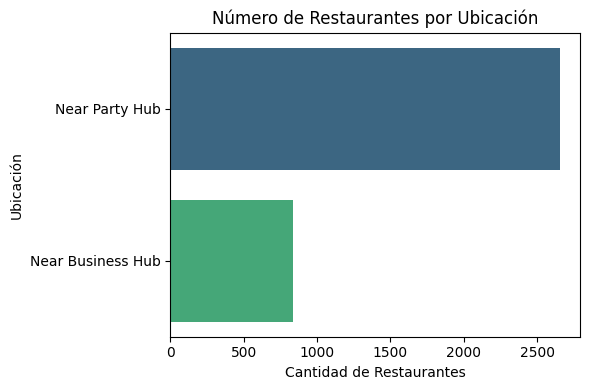

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    y='Restaurant Location',
    order=data['Restaurant Location'].value_counts().index,
    palette='viridis'
)
plt.title('Número de Restaurantes por Ubicación')
plt.xlabel('Cantidad de Restaurantes')
plt.ylabel('Ubicación')
plt.tight_layout()
plt.show()

De la gráfica anterior podemos concluir que hay un predominio de los restaurantes en lugares cercanos a Hub de fiestas, esto podría sugerir que hay cierto sesgo en el dataset, y los resultados que obtengamos van a reflejar características de este tipo de establecimientos.

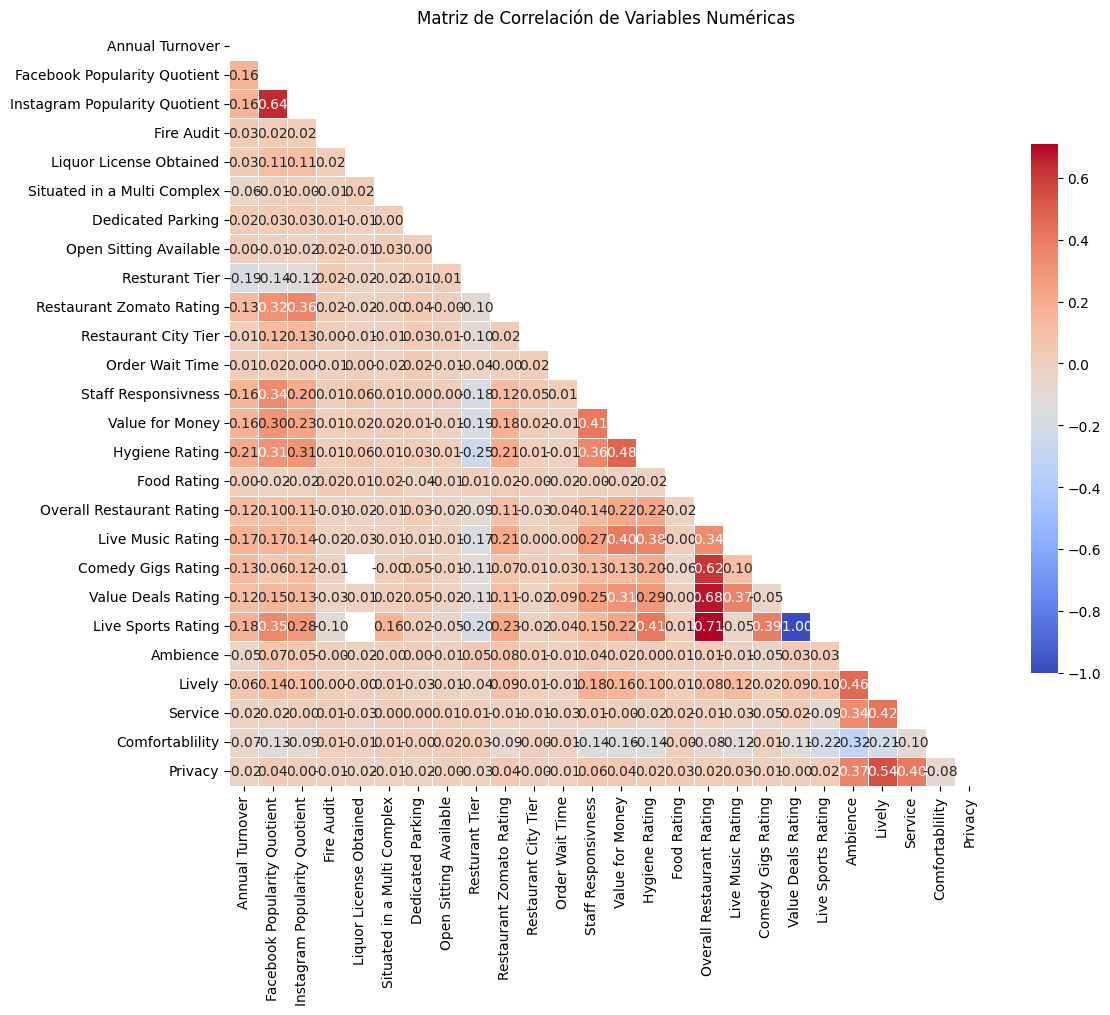

In [9]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
if 'Registration Number' in num_cols:
    num_cols.remove('Registration Number')

corr = data[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .7},
    square=True
)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

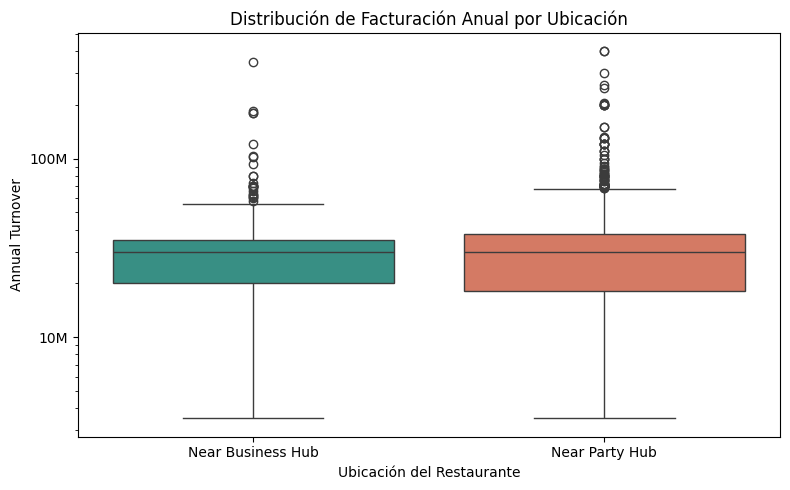

In [10]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    """Formatea el tick x como '10M', '50M', etc."""
    return f'{int(x/1e6)}M'

plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=data,
    x='Restaurant Location',
    y='Annual Turnover',
    palette=['#2a9d8f','#e76f51']
)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.title('Distribución de Facturación Anual por Ubicación')
plt.xlabel('Ubicación del Restaurante')
plt.ylabel('Annual Turnover')
plt.tight_layout()
plt.show()

- Ambas categorías tiene medianas bastante similares. Sin embargo, por parte de los restaurantes cercanos a los Hub de fiesta tiene una mediana un poco mayor. El rango intercuartílico para ambos es bastante similar, rondando alrededor de 20 Millones a 40 Millones.
- Por el lado de los outliers, para los lugares cercanos a Hubs de fiestas hay mayor cantidad de outliers, lo que indica que los lugares cercanos a Party Hub pueden tener mayor facturación con mayor frecuencia. Esto también lo podemos ver por el lado de los bigotes, el extremo de Near Party Hub, es un poco mayor comparado con Near Business Hub.
- Esto puede indicar que la ubicación por sí sola no cambia drásticamente la facturación típica, aunque los Party Hubs tienen un poco más de casos de éxitos o de mayor facturación.

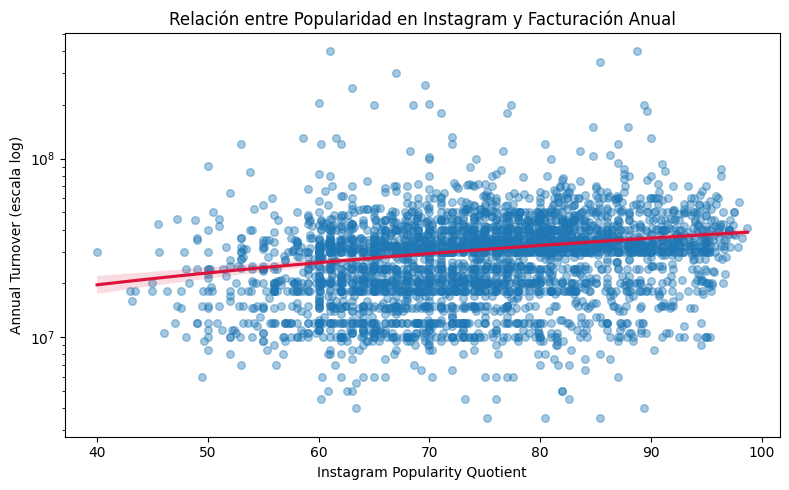

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='Instagram Popularity Quotient',
    y='Annual Turnover',
    scatter_kws={'alpha':0.4, 's':30},
    line_kws={'color':'crimson'}
)
plt.yscale('log') 
plt.title('Relación entre Popularidad en Instagram y Facturación Anual')
plt.xlabel('Instagram Popularity Quotient')
plt.ylabel('Annual Turnover (escala log)')
plt.tight_layout()
plt.show()

De la gráfica anterior podemos concluir que hay una relación positiva pero débil entre la popularidad en instagram y la facturación Anual. Sin embargo, debido a la dispersión de los puntos podemos decir que la relación es débil, pues hay restaurantes con popularidades similares pero con facturaciones diferentes. Por lo tanto, podemos conluir de aquí que no necesariamente la popularidad en redes sociales configura o garantiza tener facturaciones altas.

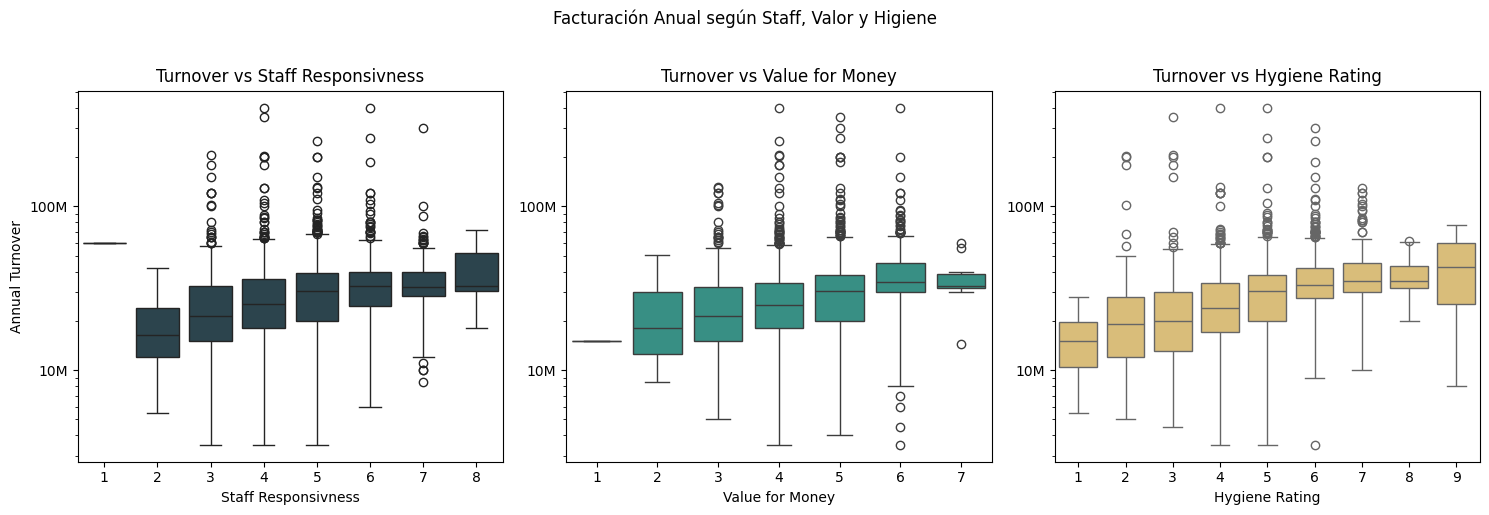

In [12]:
metrics = ['Staff Responsivness', 'Value for Money', 'Hygiene Rating']
colors = ['#264653', '#2a9d8f', '#e9c46a']

plt.figure(figsize=(15, 5))

for i, (metric, color) in enumerate(zip(metrics, colors), 1):
    ax = plt.subplot(1, 3, i)
    sns.boxplot(
        data=data,
        x=metric,
        y='Annual Turnover',
        color=color  # aquí asignamos el color directamente
    )
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FuncFormatter(millions))
    ax.set_xlabel(metric)
    if i == 1:
        ax.set_ylabel('Annual Turnover')
    else:
        ax.set_ylabel('')
    ax.set_title(f'Turnover vs {metric}')

plt.suptitle('Facturación Anual según Staff, Valor y Higiene', y=1.02)
plt.tight_layout()
plt.show()

- Staff Responsiviness:
- Los restaurantes con calificación de 2 a 3 tienen una facturación alrededor de los 15 a 17 Millones.
- En los valores intermedios (calificación de 4 a 5) tiene facturaciones más altas entre los 25 y 35 millones.
- Lo mejores rangos de facturación se pueden apreciar en entre los 6 y los 8 puntos. Por lo cual, podemos decir que un mejor servicio es sinónimo de ingresos más alto y esto es mucho más visible en los rangos más altos como las puntuaciones de 6, 7 y 8.

- Value for money:
- Tiene un comportamiento similar con Staff Responsiviness, pero el aumento de la facturación es mucho más evidente en valores altos de puntuación. El aumento de la facturación es muy marcado para puntuaciones bajas y puntuaciones altas. Para puntuaciones bajas la factuarción puede ser menor a 15 millones pero para puntuaciones altas la facturación mejora notablemente.
- Entre mejor valor perciben los clientes, mayor facturación va a haber.

- Hygiene:
- En esta parte creo que es bastante marcado que si hay un excelente higine la facturación va a aumentar drásticamente y esto se puede visualizar en los puntos más altos de calificación (7,8 y 9) y por otro lado restaurantes con calificaciones bajas la facturaciones son notablemente bajas, menor a apróximandamente a 15 Millones.

Text(0, 0.5, 'Annual Turnover')

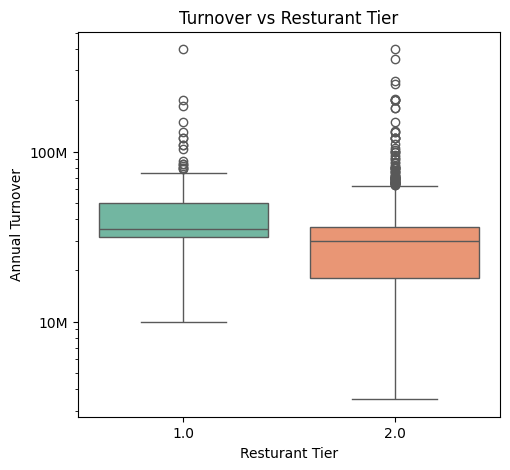

In [13]:
plt.figure(figsize=(12, 5))

# Resturant Tier
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(
    data=data,
    x='Resturant Tier',
    y='Annual Turnover',
    palette='Set2'
)
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.set_title('Turnover vs Resturant Tier')
ax1.set_xlabel('Resturant Tier')
ax1.set_ylabel('Annual Turnover')

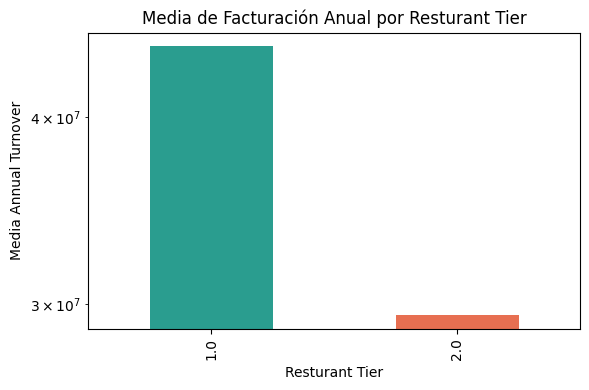

In [14]:
means = data.groupby('Resturant Tier')['Annual Turnover'].mean()

ax = means.plot(
    kind='bar',
    logy=True,
    figsize=(6, 4),
    color=['#2a9d8f', '#e76f51']
)

ax.yaxis.set_major_formatter(lambda x, _: f"{int(x/1e6)}M")

plt.title('Media de Facturación Anual por Resturant Tier')
plt.xlabel('Resturant Tier')
plt.ylabel('Media Annual Turnover')
plt.tight_layout()
plt.show()

Del boxplot podemos concluir:
- La media de los restaurantes Tier 1 esta en aproximadamente 45 millones mientras que la de Tier 2.0 esta en alrededor de 27 a 30 millones. Esto lo podemos confirmar con el bar plot que los restaurantes Tier 1 tienen mayor facturación que los restaurantes Tier 2.
- Esto confirma que la categoría del establecimiento es un factor determinante para alcanzar una facturación anual más alta.

Text(0, 0.5, 'Annual Turnover')

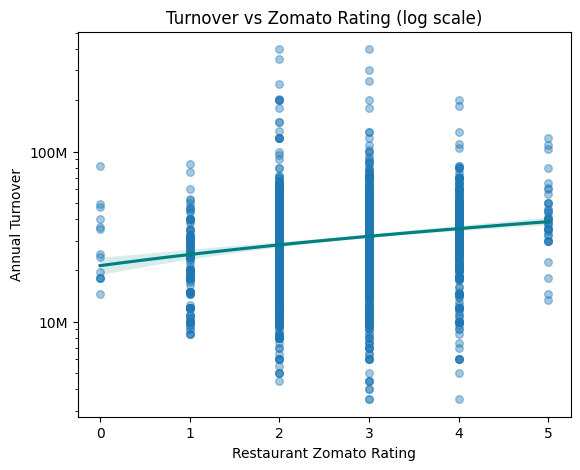

In [15]:
def fmt_millions(x, pos):
    return f'{int(x/1e6)}M'

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.regplot(
    data=data,
    x='Restaurant Zomato Rating',
    y='Annual Turnover',
    scatter_kws={'alpha':0.4, 's':30},
    line_kws={'color':'teal'}
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt_millions))
plt.title('Turnover vs Zomato Rating (log scale)')
plt.xlabel('Restaurant Zomato Rating')
plt.ylabel('Annual Turnover')

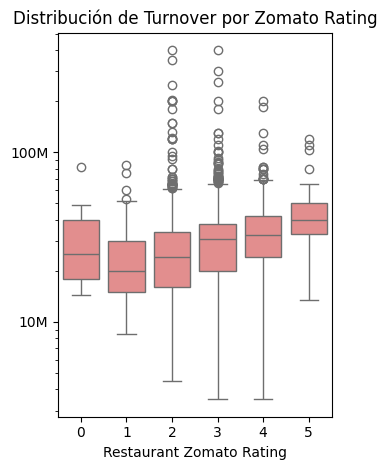

In [16]:
plt.subplot(1, 2, 2)
sns.boxplot(
    data=data,
    x='Restaurant Zomato Rating',
    y='Annual Turnover',
    color='lightcoral'
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt_millions))
plt.title('Distribución de Turnover por Zomato Rating')
plt.xlabel('Restaurant Zomato Rating')
plt.ylabel('')

plt.tight_layout()
plt.show()

- La línea de regresión del scatterplot muestra que, a medida que aumenta el Restaurant Zomato Rating de 0 a 5, la facturación anual tiende a subir.
- Hay un punto extraño con la calificación 0, que tiene una facturación por encima de 15 millones debido a que no tiene muchos samples o muestras pertenecientes a este valor.
- En todos los niveles de calificación hay outliers con facturaciones muy elevadas lo que podría indicar que restaurantes con facturaciones bajas o medias podrían tener altas facturaciones. Sin embargo, la tendencia es a la alza.

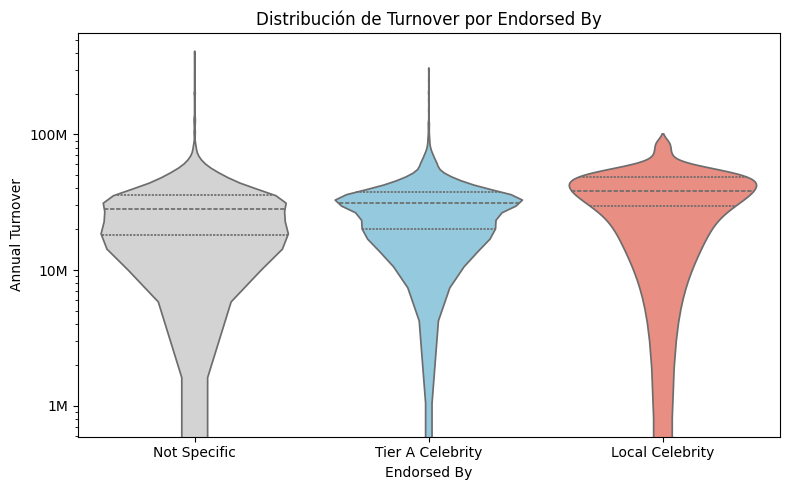

In [17]:
plt.figure(figsize=(8, 5))
ax = sns.violinplot(
    data=data,
    x='Endorsed By',
    y='Annual Turnover',
    order=['Not Specific', 'Tier A Celebrity', 'Local Celebrity'],
    palette=['lightgray','skyblue','salmon'],
    scale='count',
    inner='quartile',
)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(fmt_millions))
ax.set_title('Distribución de Turnover por Endorsed By')
ax.set_xlabel('Endorsed By')
ax.set_ylabel('Annual Turnover')
plt.tight_layout()
plt.show()

- Not Specific:
- Esta categoría tiene la mediana más baja de todos.
- La distribución es más estrecha por loq ue no hay tantos valores extremos o outliers.
- Restaurantes sin respaldo tiene menor variabilidad y además menor facturación.
- Tier A Celerity:
- Esta categoría tiene una mediana más alta que la de Not Specific lo que indica que que los ingresos anuales aumentan.
- Local Celebrity:
- Tiene la mediana más alta de todas, lo que indica que restaurantes con respaldo de celebridades locales pueden tener mayor facturación comparados con los demás.
- En conclusión los restaurantes respaldados por celebridades tendrán uan facturación más alta.

Top 10 cocinas más frecuentes:


Count
tibetan     964
greek       778
thai        549
japanese    475
british     392
turkish     372
irish       358
welsh       345
algerian    305
belgian     280

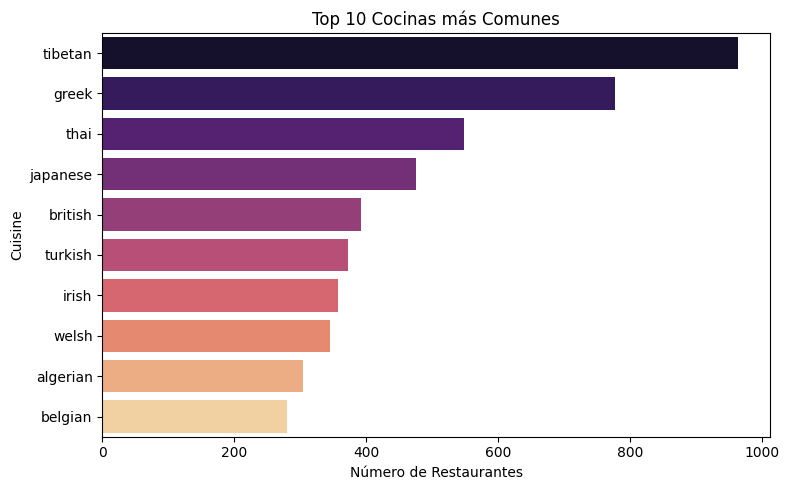

In [18]:
data_copy = data.copy()
cuisine_dummies = data_copy['Cuisine'].str.get_dummies(sep=',')
df_c = pd.concat([data_copy, cuisine_dummies], axis=1)
df_c['Num_Cuisines'] = data_copy['Cuisine'].str.count(',').fillna(0).astype(int) + 1
top_cuisines = cuisine_dummies.sum().sort_values(ascending=False).head(10)
print("Top 10 cocinas más frecuentes:")
display(top_cuisines.to_frame(name='Count'))
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cuisines.values,
    y=top_cuisines.index,
    palette='magma'
)
plt.title('Top 10 Cocinas más Comunes')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

Top 10 cocinas por facturación anual promedio:


Avg Annual Turnover
hawaiian            3.967391e+07
latvian             3.967391e+07
nigerian            3.408635e+07
tibetan             3.332158e+07
greek               3.329949e+07
jewish              3.276838e+07
polish              3.276838e+07
japanese            3.253053e+07
indian              3.215934e+07
turkish             3.160484e+07
italian             3.133813e+07
british             3.003189e+07
irish               2.994832e+07
algerian            2.944426e+07
thai                2.912386e+07
korean              2.907831e+07
peruvian            2.784783e+07
belgian             2.746071e+07
swedish             2.714130e+07
cuban               2.713010e+07
cajun               2.700000e+07
sapnish             2.664966e+07
welsh               2.600725e+07
chinese             2.500629e+07
salvadorian         2.500629e+07

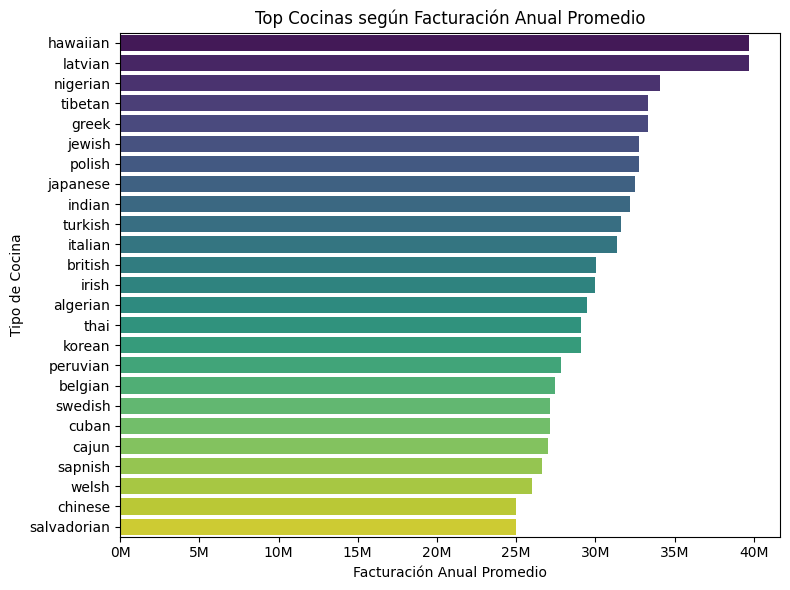

In [19]:
cuisine_cols = cuisine_dummies.columns.tolist()
mean_turnover_by_cuisine = {
    cuisine: df_c.loc[df_c[cuisine] == 1, 'Annual Turnover'].mean()
    for cuisine in cuisine_cols
}
mean_turnover_by_cuisine = pd.Series(mean_turnover_by_cuisine).sort_values(ascending=False)

top10_avg = mean_turnover_by_cuisine.head(25)
print("Top 10 cocinas por facturación anual promedio:")
display(top10_avg.to_frame(name='Avg Annual Turnover'))

plt.figure(figsize=(8, 6))
sns.barplot(
    x=top10_avg.values,
    y=top10_avg.index,
    palette='viridis'
)
plt.title('Top Cocinas según Facturación Anual Promedio')
plt.xlabel('Facturación Anual Promedio')
plt.ylabel('Tipo de Cocina')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fmt_millions))
plt.tight_layout()
plt.show()

La lista de cocinas de cocinas más comunes muestra las 10 cocinas más comunes, entre ellas las dos primeras son la cocina tibetana y la griega. Sin embargo, cuando venimos a la facturación promedio generada por cada tipo de cocina vemos que cocinas como Hawaiian y Latvian lideran el ranking. Por lo que ofrecer tipos de cocinas un poco más exóticas podría sser diferencial para aumentar la facturación.

In [20]:
data['Registration Date'] = pd.to_datetime(data['Opening Day of Restaurant'])
data['Years_Open'] = (pd.Timestamp.today() - data['Registration Date']).dt.days / 365

<Axes: xlabel='Years_Open', ylabel='Annual Turnover'>

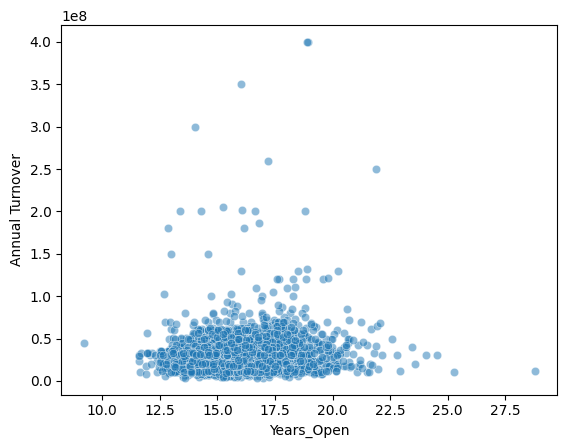

In [21]:
sns.scatterplot(data=data, x='Years_Open', y='Annual Turnover', alpha=0.5)

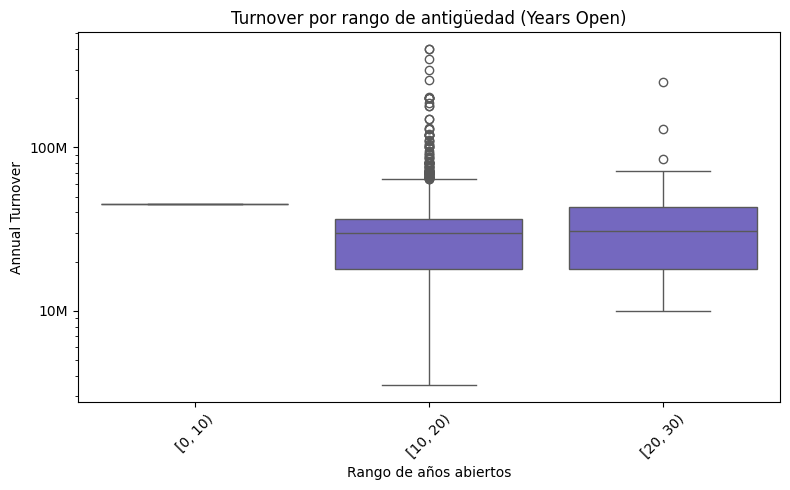

In [22]:
data['Age_Bin'] = pd.cut(data['Years_Open'], bins=range(0, 35, 10), right=False)
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data,
    x='Age_Bin',
    y='Annual Turnover',
    color='slateblue'
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1e6)}M"))
plt.xticks(rotation=45)
plt.xlabel('Rango de años abiertos')
plt.ylabel('Annual Turnover')
plt.title('Turnover por rango de antigüedad (Years Open)')
plt.tight_layout()
plt.show()

Del boxplot anterior podemos visualizar que los restaurantes con más de 20 años de antiguedad pueden generar un mayor retorno, sin emabgo no es muy alta. También podemos ver que hay almacénes jóvenes que generan mucho dinero, por lo que la antiguedad no asegura que la facturación aumente.

# Conclusiones

# Limpieza de datos

Las siguientes variables mostraron un alto porcentaje de correlación con nuestra variable objetiva pero tienen muchos nulos, así que en lugar de eliminarlos se decide imputar los valores para completar los nulos por medio de la mediana. Se escoge la mediana debido a que tiene baja suceptibilidad al ruido.

In [23]:
for col in ['Live Sports Rating','Value Deals Rating','Comedy Gigs Rating','Live Music Rating']:
    data[col + '_missing'] = data[col].isna().astype(int)

imputer = SimpleImputer(strategy='median')
data[['Live Sports Rating','Value Deals Rating','Comedy Gigs Rating','Live Music Rating']] = imputer.fit_transform(
    data[['Live Sports Rating','Value Deals Rating','Comedy Gigs Rating','Live Music Rating']]
)

In [24]:
data_def = data.drop(columns=['Live Sports Rating','Value Deals Rating','Comedy Gigs Rating','Live Music Rating'])

Se eliminan las siguientes varaibles debido a que ya estan representadas por el por age_restaurant que es una variable que representa el tiempo de vida del restaurante.

In [25]:
data_def = data_def.drop(columns=['Opening Day of Restaurant','Registration Date','Age_Bin'])

In [26]:
data_def = data_def.drop(columns=['Registration Number'])

Para verificar como influyen algunas variables en nuestra variable objetiva Annual Turnover usamos ANOVA, la cual nos dicata que si el p-value es menor a 0.005 la variable tiene un gran impacto sobre nuestra variable Y o de salida. Esto en caso de de que se quiera explorar la relación de la una variable categórica con un nuestra variable Y que es continua.

In [27]:
from scipy.stats import f_oneway

groups = [group["Annual Turnover"].values for _, group in data_def.groupby("Restaurant Type")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")


F-statistic: 2.56
P-value: 0.0533


In [28]:
groups = [group["Annual Turnover"].values for _, group in data_def.groupby("Cuisine")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 5.14
P-value: 0.0000


In [29]:
groups = [group["Annual Turnover"].values for _, group in data_def.groupby("Restaurant Theme")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 0.77
P-value: 0.8286


In [30]:
groups = [group["Annual Turnover"].values for _, group in data_def.groupby("City")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 1.71
P-value: 0.0000


In [31]:
groups = [group["Annual Turnover"].values for _, group in data_def.groupby("Restaurant Location")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 3.44
P-value: 0.0638


In [32]:
groups = [group["Annual Turnover"].values for _, group in data_def.groupby("Endorsed By")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 5.77
P-value: 0.0031


También se trata de buscar algunas interacciones entre algunos terminnos con Annual Turnover. En este caso se utiliza statsmodels para definir la ecuación con el término de interacción y se procede a verificar que el p value < 0.05

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Restaurant Type": "Restaurant_Type",
    "Restaurant Location": "Restaurant_Location",
    "Annual Turnover": "Annual_Turnover"
})
model = smf.ols(
    "Annual_Turnover ~ Restaurant_Type * Restaurant_Location",
    data=data_def_test
).fit()
print(model.summary())
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

                            OLS Regression Results                            
Dep. Variable:        Annual_Turnover   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.413
Date:                Thu, 31 Jul 2025   Prob (F-statistic):            0.00232
Time:                        08:02:21   Log-Likelihood:                -63944.
No. Observations:                3493   AIC:                         1.279e+05
Df Residuals:                    3486   BIC:                         1.279e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2



In [34]:
import statsmodels.formula.api as smf

# Renombra columnas para no tener espacios
df = data_def.rename(columns={
    'Years_Open': 'Years_Open',
    'Restaurant Zomato Rating': 'Zomato_Rating',
    'Annual Turnover': 'Annual_Turnover'
})

# Ajusta modelo con interacción continua×continua
# El término Years_Open:Zomato_Rating es el producto
model = smf.ols(
    'Annual_Turnover ~ Years_Open * Zomato_Rating',
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual_Turnover   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     51.70
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.10e-32
Time:                        08:02:21   Log-Likelihood:                -63879.
No. Observations:                3493   AIC:                         1.278e+05
Df Residuals:                    3489   BIC:                         1.278e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
import statsmodels.formula.api as smf
df = data_def.rename(columns={
    'Fire Audit': 'Fire_Audit',
    'Liquor License Obtained': 'Liquor_License_Obtained',
    'Annual Turnover': 'Annual_Turnover'
})

model = smf.ols(
    'Annual_Turnover ~ Liquor_License_Obtained * Fire_Audit',
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual_Turnover   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.851
Date:                Thu, 31 Jul 2025   Prob (F-statistic):              0.136
Time:                        08:02:21   Log-Likelihood:                -63952.
No. Observations:                3493   AIC:                         1.279e+05
Df Residuals:                    3489   BIC:                         1.279e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [36]:
import statsmodels.formula.api as smf
df = data_def.rename(columns={
    'Situated in a Multi Complex': 'Situated_in_a_Multi_Complex',
    'Dedicated Parking': 'Dedicated_Parking',
    'Annual Turnover': 'Annual_Turnover'
})

model = smf.ols(
    'Annual_Turnover ~ Situated_in_a_Multi_Complex * Dedicated_Parking',
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual_Turnover   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.502
Date:                Thu, 31 Jul 2025   Prob (F-statistic):            0.00370
Time:                        08:02:21   Log-Likelihood:                -63948.
No. Observations:                3493   AIC:                         1.279e+05
Df Residuals:                    3489   BIC:                         1.279e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [37]:
import statsmodels.formula.api as smf
df = data_def.rename(columns={
    'Food Rating': 'Food_Rating',
    'Service': 'Service',
    'Annual Turnover': 'Annual_Turnover'
})

model = smf.ols(
    'Annual_Turnover ~ Food_Rating * Service',
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual_Turnover   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8297
Date:                Thu, 31 Jul 2025   Prob (F-statistic):              0.477
Time:                        08:02:21   Log-Likelihood:                -63953.
No. Observations:                3493   AIC:                         1.279e+05
Df Residuals:                    3489   BIC:                         1.279e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              3.5e+07   4

In [38]:
data_def = data_def.drop(columns=['Restaurant Theme'])

In [39]:
data_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant Location            3493 non-null   object 
 4   Facebook Popularity Quotient   3394 non-null   float64
 5   Endorsed By                    3493 non-null   object 
 6   Instagram Popularity Quotient  3437 non-null   float64
 7   Fire Audit                     3493 non-null   int64  
 8   Liquor License Obtained        3493 non-null   int64  
 9   Situated in a Multi Complex    3493 non-null   int64  
 10  Dedicated Parking              3493 non-null   int64  
 11  Open Sitting Available         3493 non-null   int64  
 12  Resturant Tier                 3444 non-null   f

La variable categorica City tiene muchas features por lo cual manejarla luego del one hot podría ser complicado pues ingresa muchas componentes al sistema, por ello se decide primero limpiar el dato -1 que tiene por Unknown y reducr la cantidad de categorías marcando aquellas ciudades que tengan una frecuencia menor a 50 como otras.

In [40]:
data_def['City'] = data_def['City'].replace('-1', 'Unknown')
city_counts = data_def['City'].value_counts()
rare_cities = city_counts[city_counts < 50].index
data_def['City_Grouped'] = data_def['City'].replace(rare_cities, 'Other')

In [41]:
data_def = data_def.drop(columns=['City'])

Se realiza un One Hot simplemnte para transformar las variables categóricas en variables continuas y luego se combinan de nuevo todas en el dataset.

In [42]:
catCol = data_def.select_dtypes(include= ['object'] ).columns.to_list()
numCol = data_def.select_dtypes(include= ['float64','int64'] ).columns.to_list()

preprocesador = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown = 'ignore'),catCol)],remainder = 'passthrough')


datospre =preprocesador.fit_transform(data_def)



In [43]:
codCat=preprocesador.named_transformers_['onehot'].get_feature_names_out(catCol)
labels = np.concatenate([codCat,numCol])

In [44]:
datosProc = pd.DataFrame(datospre, columns=labels)

In [45]:
imp_mean = SimpleImputer(strategy='median')
df_med = pd.DataFrame(imp_mean.fit_transform(datosProc), columns=datosProc.columns)

In [46]:
df_med['Annual Turnover Log'] = np.log1p(df_med['Annual Turnover'])

En la gráfica de la distribución de la variable Annual Turnover, se puede evidenciar que hay puntos o posibles outliers en su cola, es decir, al final de la distribución así que se decide buscarlos por medio del método del rango intercuartílico, pero esto se realiza sobre la transformación logaritmica de la variable Annual Turnover, debido a que esta si es lineal.

In [47]:
Q1 = df_med['Annual Turnover Log'].quantile(0.25)
Q3 = df_med['Annual Turnover Log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = df_med[(df_med['Annual Turnover Log'] >= lower_bound) & (df_med['Annual Turnover Log'] <= upper_bound)]

print(f"Filtrados: {filtered_data.shape[0]} filas (sin outliers)")

Filtrados: 3436 filas (sin outliers)


In [48]:
filtered_data=filtered_data.drop(columns=['Fire Audit','Liquor License Obtained','Situated in a Multi Complex','Dedicated Parking','Open Sitting Available','Food Rating','Ambience','Lively','Service','Comfortablility','Privacy'])

Se crea el término de interacción entre Tipo de restaurante y la locación del restaurante. Ya se verificó nateriormente este término.

In [49]:
type_cols     = [c for c in filtered_data.columns if c.startswith('Restaurant Type_')]
loc_cols      = [c for c in filtered_data.columns if c.startswith('Restaurant Location_')]
for t in type_cols:
    for l in loc_cols:
        filtered_data[f"{t}_x_{l}"] = filtered_data[t] * filtered_data[l]

In [50]:
x=filtered_data.drop(columns=['Annual Turnover','Annual Turnover Log'])
y=filtered_data[['Annual Turnover Log']]

In [51]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x,y,train_size=0.7, random_state=123)

In [52]:
def run_grid_search(
    X_train, y_train,
    X_test=None, y_test=None,
    estimator=None,
    param_grid=None,
    cv_splits=5,
    metrics=None,
    random_state=42,
    n_jobs=-1,
    verbose=0
):
    if metrics is None:
        metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

    scoring = {m: m for m in metrics}
    refit_metric = metrics[0]

    inner_cv = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    grid = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=scoring,
        cv=inner_cv,
        refit=refit_metric,
        return_train_score=False,
        n_jobs=n_jobs,
        verbose=verbose
    )
    grid.fit(X_train, y_train)

    df = pd.DataFrame(grid.cv_results_)
    for m in metrics:
        col = f"mean_test_{m}"
        if m.startswith('neg_'):
            name = m.replace('neg_', '')
            df[f"mean_test_{name}"] = -df[col]
        else:
            df[f"mean_test_{m}"] = df[col]

    results = {
        'best_estimator': grid.best_estimator_,
        'best_params':    grid.best_params_,
        'cv_results_df':  df
    }

    y_train_pred = grid.best_estimator_.predict(X_train)
    results['train_scores'] = {
        'mse': mean_squared_error(y_train, y_train_pred),
        'mae': mean_absolute_error(y_train, y_train_pred),
        'r2':  r2_score(y_train, y_train_pred)
    }

    if X_test is not None and y_test is not None:
        y_test_pred = grid.best_estimator_.predict(X_test)
        results['test_scores'] = {
            'mse': mean_squared_error(y_test, y_test_pred),
            'mae': mean_absolute_error(y_test, y_test_pred),
            'r2':  r2_score(y_test, y_test_pred)
        }

    return results

In [53]:
ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False]
}


results = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    xPrueba, yPrueba,
    estimator=ridge,
    param_grid=param_grid,
    cv_splits=5,
    metrics=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    verbose=1
)

print("Mejores parámetros:", results['best_params'])
print("Métricas en entrenamiento:", results['train_scores'])
print("Métricas en prueba:", results['test_scores'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'alpha': 10.0, 'fit_intercept': True}
Métricas en entrenamiento: {'mse': 0.1707845921813257, 'mae': 0.3239021846053209, 'r2': 0.3217694763276838}
Métricas en prueba: {'mse': 0.17023787978912394, 'mae': 0.32748986203683783, 'r2': 0.3121554471541741}


El hecho de que las métricas en test sean muy cercanas a las de entrenamiento indica que no hay sobreajuste notable y que el modelo generaliza bien con la regularización aplicada. Un R2 de alrededor de 0.32 significa que el modelo está explicando aproximadamente el 32 % de la variabilidad en la facturación anual con las características escogidas.

In [59]:
lr = LinearRegression()
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X':        [True, False],
    'positive':      [False, True], 
    'tol':           [1e-6, 1e-4, 1e-2] 
}
results_lr = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=lr,
    param_grid=param_grid_lr,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2'],
    verbose=1
)
print("→ Mejores parámetros LR:", results_lr['best_params'])
print("→ Train scores:", results_lr['train_scores'])
print("→ Test  scores:", results_lr['test_scores'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
→ Mejores parámetros LR: {'copy_X': True, 'fit_intercept': True, 'positive': False, 'tol': 1e-06}
→ Train scores: {'mse': 0.17054363472839698, 'mae': 0.32353328926682057, 'r2': 0.3227263817334659}
→ Test  scores: {'mse': 0.17066488535518398, 'mae': 0.32776813346876604, 'r2': 0.31043013517887763}


El hecho de que las métricas en test sean muy cercanas a las de entrenamiento indica que no hay sobreajuste notable y que el modelo generaliza bien con la regularización aplicada. Un R2 de alrededor de 0.32 significa que el modelo está explicando aproximadamente el 32 % de la variabilidad en la facturación anual con las características escogidas.

In [63]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

param_grid_xgb = {
    'n_estimators':      [100, 300, 500],
    'max_depth':         [3, 5, 7],
    'learning_rate':     [0.01, 0.05, 0.1],
    'reg_alpha':         [0, 0.1, 1.0],
    'reg_lambda':        [1.0, 5.0, 10.0]
}

results_xgb = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2'],
    verbose=1
)

print("→ Mejores parámetros XGB:", results_xgb['best_params'])
print("→ Train scores:", results_xgb['train_scores'])
print("→ Test  scores:", results_xgb['test_scores'])

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
→ Mejores parámetros XGB: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1.0, 'reg_lambda': 10.0}
→ Train scores: {'mse': 0.14007386565208435, 'mae': 0.29073190689086914, 'r2': 0.44372987747192383}
→ Test  scores: {'mse': 0.16957393288612366, 'mae': 0.3250768780708313, 'r2': 0.314838171005249}


Mi configuración de XGBRegressor prioriza un aprendizaje gradual y controlado: uso árboles poco profundos que aportan interacciones de bajo orden y, al ensamblarlos en gran número, disminuyo la varianza y evito el sobreajuste. La tasa de aprendizaje moderada me obliga a más iteraciones para afinar el modelo, mientras que la regularización L1 me ayuda a descartar ganancias irrelevantes y la L2 estabiliza los pesos, obteniendo así un modelo robusto que captura las no linealidades sin memorizar el ruido. En entrenamiento, el R2 sube a aproximadamente 0.44 (frente a 0.32 de la regresión lineal/Ridge) y el MSE baja notablemente; sin embargo, en el test el R2 (0.315) y el MSE (0.170), lo que indica que XGBoost está capturando más no linealidad en el conjunto de entrenamiento, pero esa ventaja no se traslada completamente al test set. La diferencia entre el R2 de train y test sugiere, además, un grado moderado de sobreajuste.

In [66]:
ada_model = AdaBoostRegressor(
    random_state=42
)
param_grid_ada = {
    'n_estimators':      [50, 100, 200, 500],
    'learning_rate':     [0.01, 0.1, 0.5, 1.0],
    'loss':              ['linear', 'square', 'exponential']
}
results_ada = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=ada_model,
    param_grid=param_grid_ada,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2'],
    verbose=1
)

print("→ Mejores parámetros AdaBoost:", results_ada['best_params'])
print("→ Train scores:", results_ada['train_scores'])
print("→ Test  scores:", results_ada['test_scores'])


Fitting 5 folds for each of 48 candidates, totalling 240 fits
→ Mejores parámetros AdaBoost: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 500}
→ Train scores: {'mse': 0.19212680613637906, 'mae': 0.35148789736797637, 'r2': 0.2370139327380485}
→ Test  scores: {'mse': 0.19999386479385783, 'mae': 0.36105204028318316, 'r2': 0.19192666948482306}


Mi AdaBoostRegressor optimizado con learning_rate=0.01, loss='linear' y n_estimators=500 obtuvo en entrenamiento un MSE de 0.1921 y un R2
de 0.2370, mientras que en test escaló ligeramente a un MSE de 0.1999 y un R2
de 0.1919. Los resultados de test y de train son bastantes semejantes por lo que indica que no hay sobreajuste de hecho con una tasa de aprendizaje tan pequeña hay una perdida lineal alta y el modelo no logra generalizar.

In [54]:
mlp = MLPRegressor(
    random_state=42,
    max_iter=500
)

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

results_mlp = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2'],
    verbose=1
)

print("→ Mejores parámetros MLP:", results_mlp['best_params'])
print("→ Train scores:",   results_mlp['train_scores'])
print("→ Test scores: ",   results_mlp['test_scores'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
→ Mejores parámetros MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
→ Train scores: {'mse': 0.18098158385076957, 'mae': 0.32570871367069093, 'r2': 0.2812745410907488}
→ Test scores:  {'mse': 0.18787915457855658, 'mae': 0.3350963225113194, 'r2': 0.24087604221680792}
